# Customer Churn Analysis

# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Problem Statement:
The Goal is to predict whether Customer will loose or Churn or not, churn is the target col with binary classification.

# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- We have succesfully imported libraries and also imported the dataset.
- From the dataset we can see that there is various (21) columns including the target variable (Churn).
- Now lets understand more about the dataset.

# Exploratory Data Analysis(EDA)

Firstly to understand about the dataset, we should know how much data is there in the dataset. 

In [3]:
# Checking the dimensions of this dataset.
df.shape

(7043, 21)

- Dataset consists of 7043 rows & 21 cols including the target variable.

In [4]:
# checkng the columns present in the dataset.
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- No space or special characters seen in the title of the columns.

In [5]:
# To confirm about the first prediction right, Cheching the datatypes of all the columns.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- 1 float, 2 int and 18 objects variables.
- int64 = 2 (SeniorCitizen, tenure)
- float64 = 1 (MonthlyCharges)
- object = 18
- dataset will be separated with numeric & objects cols

In [6]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The dataset do not have missing value still lets reconfirm.

In [7]:
# checking the null values in the dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- We can see that there are no null values in our dataset but still we have to check it closely for any missing,nan,? values to clean our dataset

In [8]:
#Check for duplicate data
df.duplicated().sum()

0

- The dataset do not have duplicate value.

In [9]:
# customerID col is dropped which is of least imp
df.drop(['customerID'],axis=1, inplace=True) 
# Checking the dimensions of this dataset.
df.shape

(7043, 20)

- Now Dataset consists of 7043 rows & 20 cols including the target variable.

In [10]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

- In the gender column we have only 2 variables that is male and female.

In [11]:
#Checking uniques of object datatypes columns to improve EDA
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

- Out of 7043 customers, 6361 have PhoneService where as 682 do not have PhoneService.
- Out of 6361 customers, 3390 have MultipleLines and 2971 do not have MultipleLines.
- Out of 7043 customers, 3096 have Fiber optic , 2421 DSL that is total of 5517 have InternetService.
- Out of 7043 customers, 1526 No InternetService.
- Out of 5517 customers, 2019 have OnlineSecurity and 3498 dont.
- Out of 5517 customers, 2429 have OnlineBackup, and 3088 dont.
- Out of 5517 customers, 2422 have DeviceProtection, and 3095 dont.
- Out of 5517 customers, 2044 have TechSupport, and 3473 dont.
- Out of 5517 customers, 2707 have StreamingTV, and 2810 dont.
- Out of 5517 customers, 2732 have StreamingMovies, and 2785 dont.
- Out of 7043 customers, 3875 have Month-to-month Contract, 1695 have Two year Contract & 1473 have One year Contract.          

In [12]:
# Converted to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') 

In [13]:
# check the rows which have NaN in the TotalCharges column
df.loc[df['TotalCharges'].isna()==True] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Some of the columns in TotalCharges have NAN values.
- lets replace it with median.

In [14]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [15]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen']) # Converting Seniorcitizen into cat var

In [16]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

- Diving the dataset into odject and numeric to simplify the EDA.

In [17]:
#Checking the statistical Summary of the dataset
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


- Monthlycharges shows big diff between max & 75th Percentile.
- Totalcharges also shows big diff bwteen max & 75th Percentile.
- Std is high for TotalCharges & Mean is also > then 50th percentile
- As per above obs it seems data is skewed, spreaded.

In [18]:
objects_ds.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


- From above it is clear that the top in gender is male with freq 3555.
- 6361 customers have PhoneService and 3390 do not have MultipleLines.
- Fiber optic is the most used InternetService.
- Most of the customers that is 3875 have prefered Month-to-month Contract.
- Most of the customers that is 4171 have prefered PaperlessBilling.

In [19]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

- Target col - churn class is not balance which is balanced later by upsampling technique.

# Data Visualization

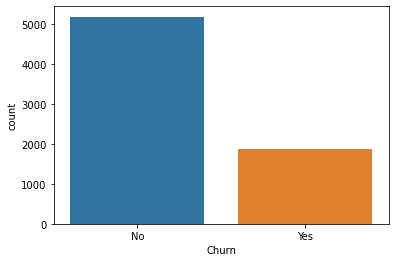

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


(No     5174
 Yes    1869
 Name: Churn, dtype: int64,
 None)

In [20]:
sns.countplot(df['Churn'])
plt.show()
df['Churn'].value_counts() , print(df['Churn'].value_counts(normalize=True))

- We can see that 73.4% customers who are likely to churn compared 26.5% customers who are likely to churn.

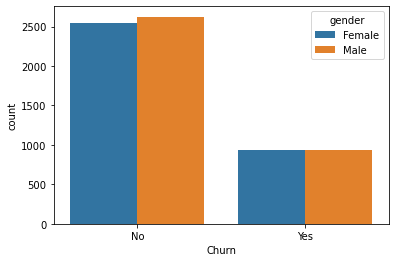

In [21]:
sns.countplot(hue='gender',x='Churn',data=df)
plt.show()

- We can see that Female customers are not likely to churn as compared to Female customers who are likely to churn.
- We can see that Male customers are not likely to churn as compared to Male customers who are likely to churn.

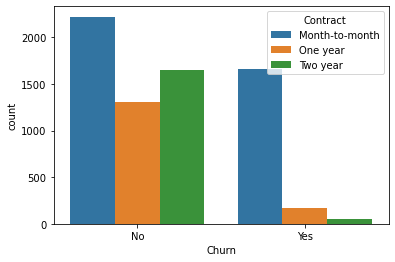

In [22]:
sns.countplot(x='Churn',hue='Contract',data=df)
plt.show()

- We can see that customers who are on Monthly contract are more and more likely to churn then who are on 1 year and 2 year contract

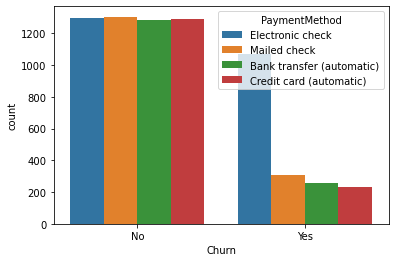

In [23]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df)
plt.show()

- We can see that customers whose payment method is Electronic Cheque are more likely to churn as compared to other mode of Payment

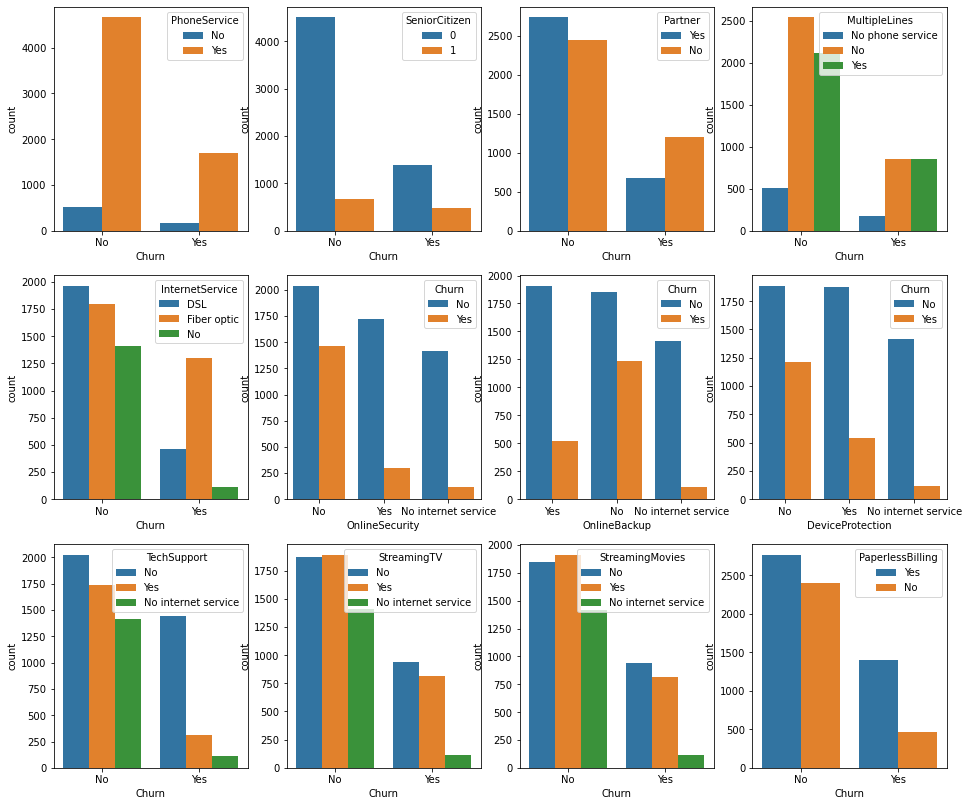

In [24]:
#Plotting for each factors with respect to Churn to get the insight 
fig, ax =plt.subplots(3,4,figsize=(16,14))
sns.countplot(hue='PhoneService',x='Churn',data=df, ax=ax[0,0])
sns.countplot(hue='SeniorCitizen',x='Churn',data=df,ax=ax[0,1])
sns.countplot(hue='Partner',x='Churn',data=df,ax=ax[0,2])
sns.countplot(hue='MultipleLines',x='Churn',data=df,ax=ax[0,3])
sns.countplot(hue='InternetService',x='Churn',data=df,ax=ax[1,0])
sns.countplot(x='OnlineSecurity',hue='Churn',data=df,ax=ax[1,1])
sns.countplot(x='OnlineBackup',hue='Churn',data=df,ax=ax[1,2])
sns.countplot(x='DeviceProtection',hue='Churn',data=df,ax=ax[1,3])
sns.countplot(hue='TechSupport',x='Churn',data=df,ax=ax[2,0])
sns.countplot(hue='StreamingTV',x='Churn',data=df,ax=ax[2,1])
sns.countplot(hue='StreamingMovies',x='Churn',data=df,ax=ax[2,2])
sns.countplot(hue='PaperlessBilling',x='Churn',data=df,ax=ax[2,3])
fig.show()
plt.show()

# Label Encoder

In [25]:
# categorical variable encoding
cat_vars_list = objects_ds.columns.tolist()

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- Converting the values into simple codes for simplier learning.

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


- all the columns are being converted for easy understanding.

# Correlation between the target variable and independent variable

In [27]:
# checking the correlation of features and labels
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


<AxesSubplot:>

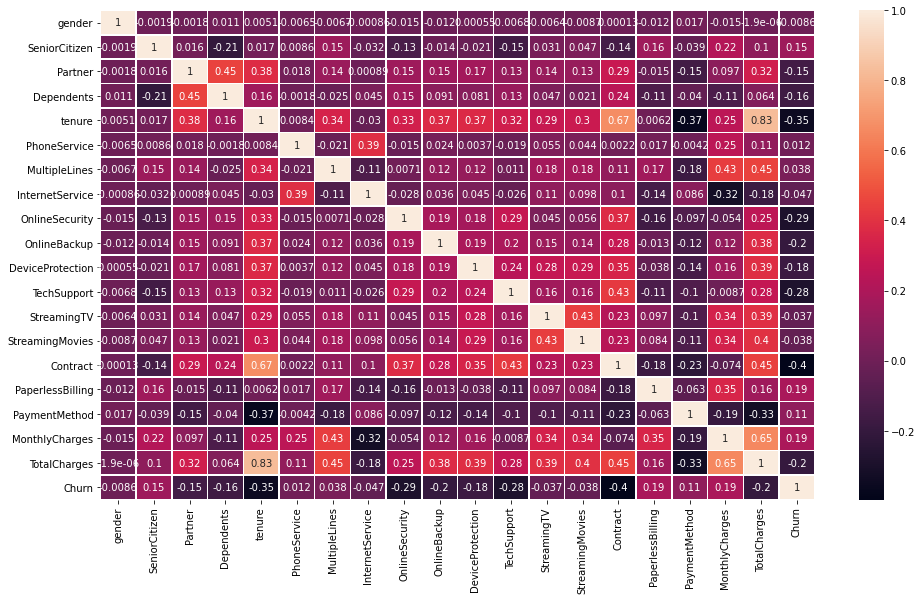

In [28]:
# Heat Map
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=0.5,annot = True)

- Churn doesnt show corr with almost any variables.
- Tenure has corr with TotalCharges & contract


# Skewness Detection:

In [29]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

# Boxplot for Outliers Detection:

<AxesSubplot:>

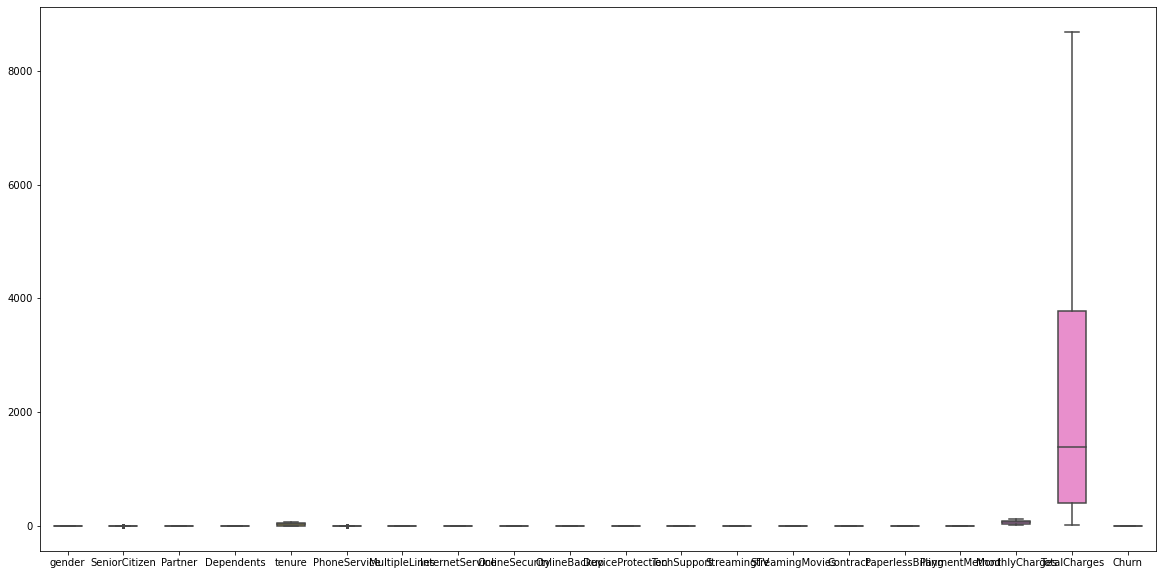

In [30]:
fig, ax =plt.subplots(figsize=(20,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=2)

# VIF : Multicollinearity Test :

In [31]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [32]:
vif_calc()

    VIF Factor          features
0     1.954594            gender
1     1.372968     SeniorCitizen
2     2.821545           Partner
3     1.964165        Dependents
4    14.743717            tenure
5    15.185873      PhoneService
6     2.757141     MultipleLines
7     4.382575   InternetService
8     2.259590    OnlineSecurity
9     2.460279      OnlineBackup
10    2.634106  DeviceProtection
11    2.394247       TechSupport
12    3.240595       StreamingTV
13    3.262158   StreamingMovies
14    4.176811          Contract
15    2.888549  PaperlessBilling
16    3.109949     PaymentMethod
17   22.308166    MonthlyCharges
18   14.242253      TotalCharges
19    1.861734             Churn


- Monthlycharges, TotalCharges shows high VIF values which indicates having multicollinearity among them.
- rest others are cat variables where multicollinearity is of least signinificant.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

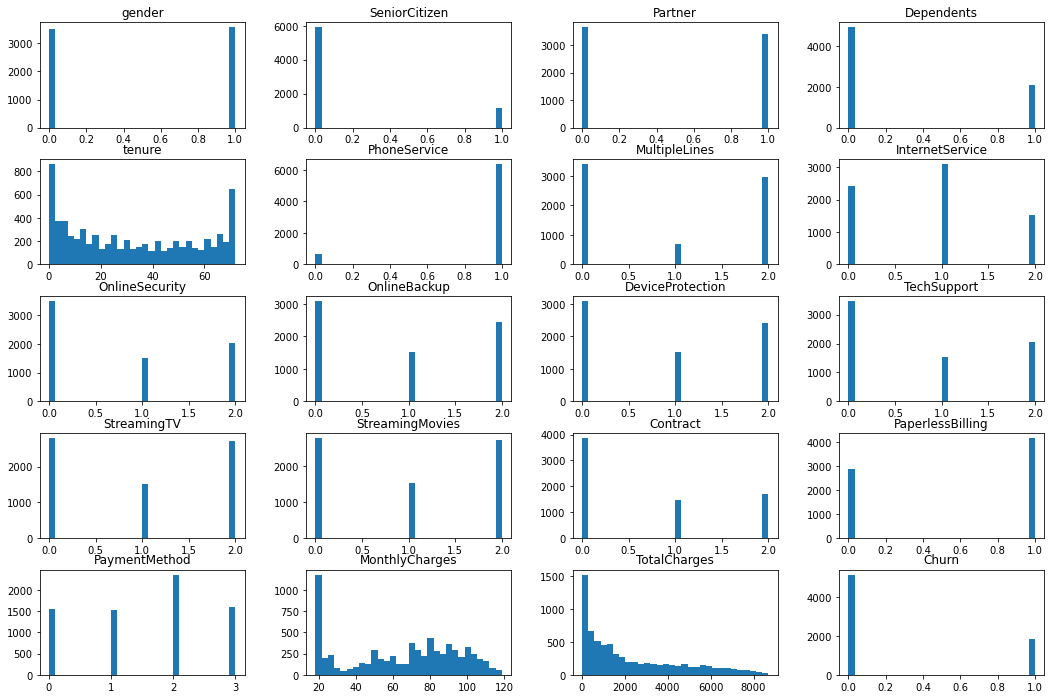

In [33]:
df.hist(grid=False, figsize=(18,12), bins=30)

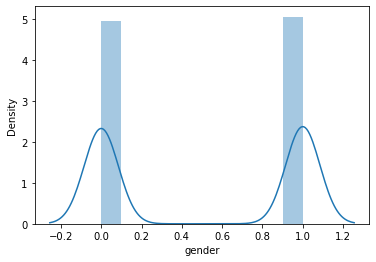

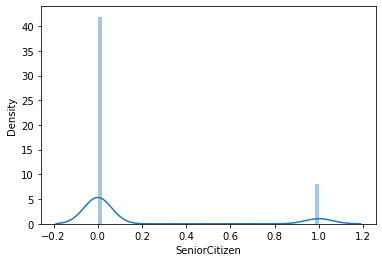

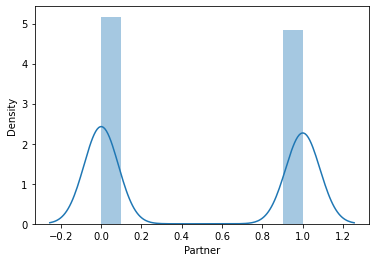

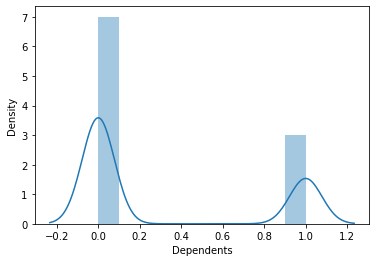

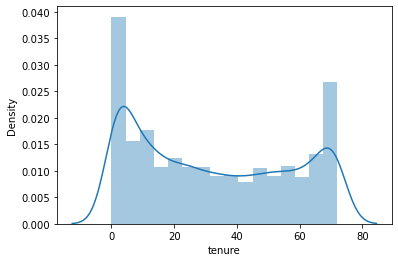

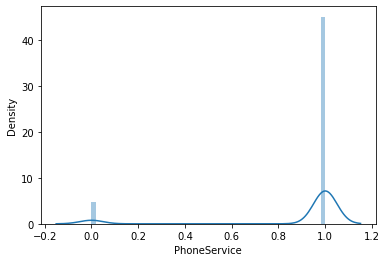

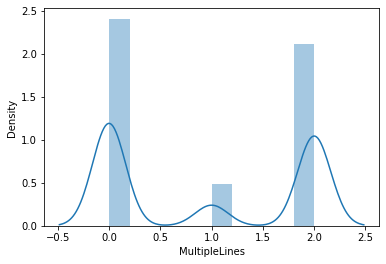

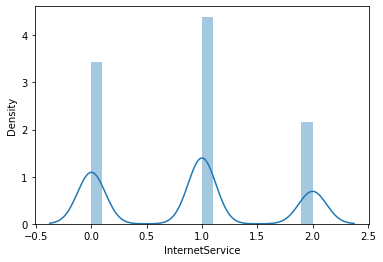

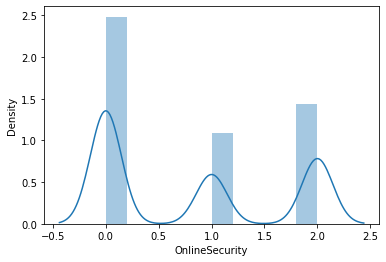

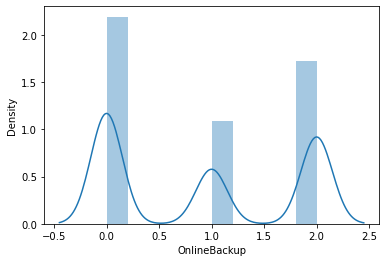

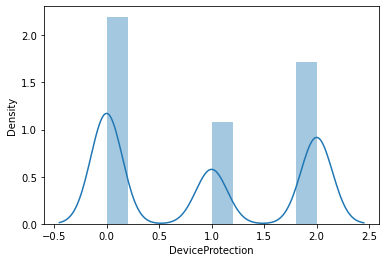

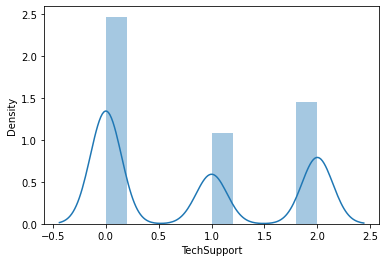

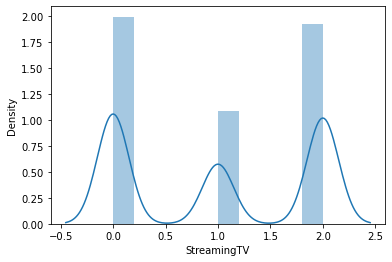

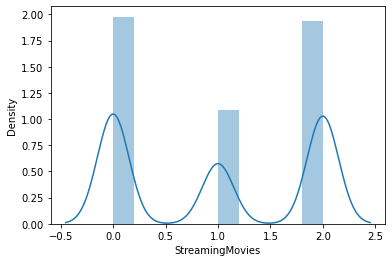

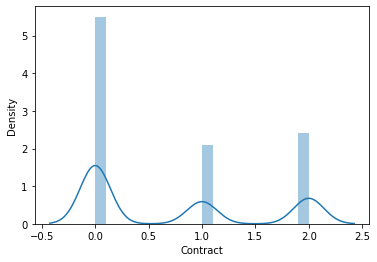

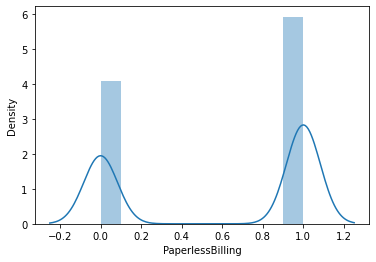

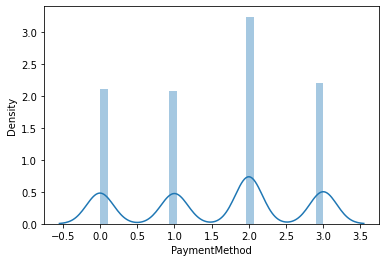

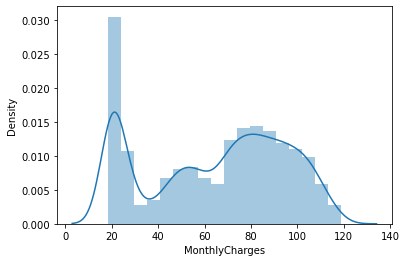

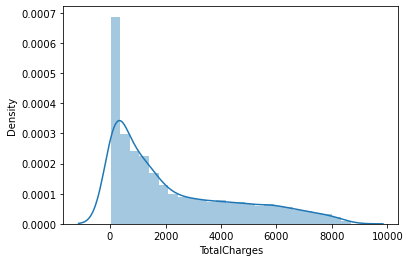

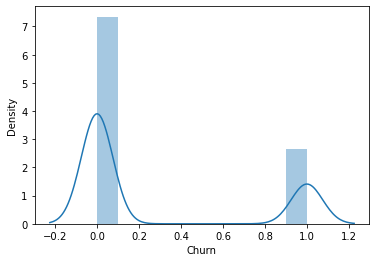

In [34]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:>

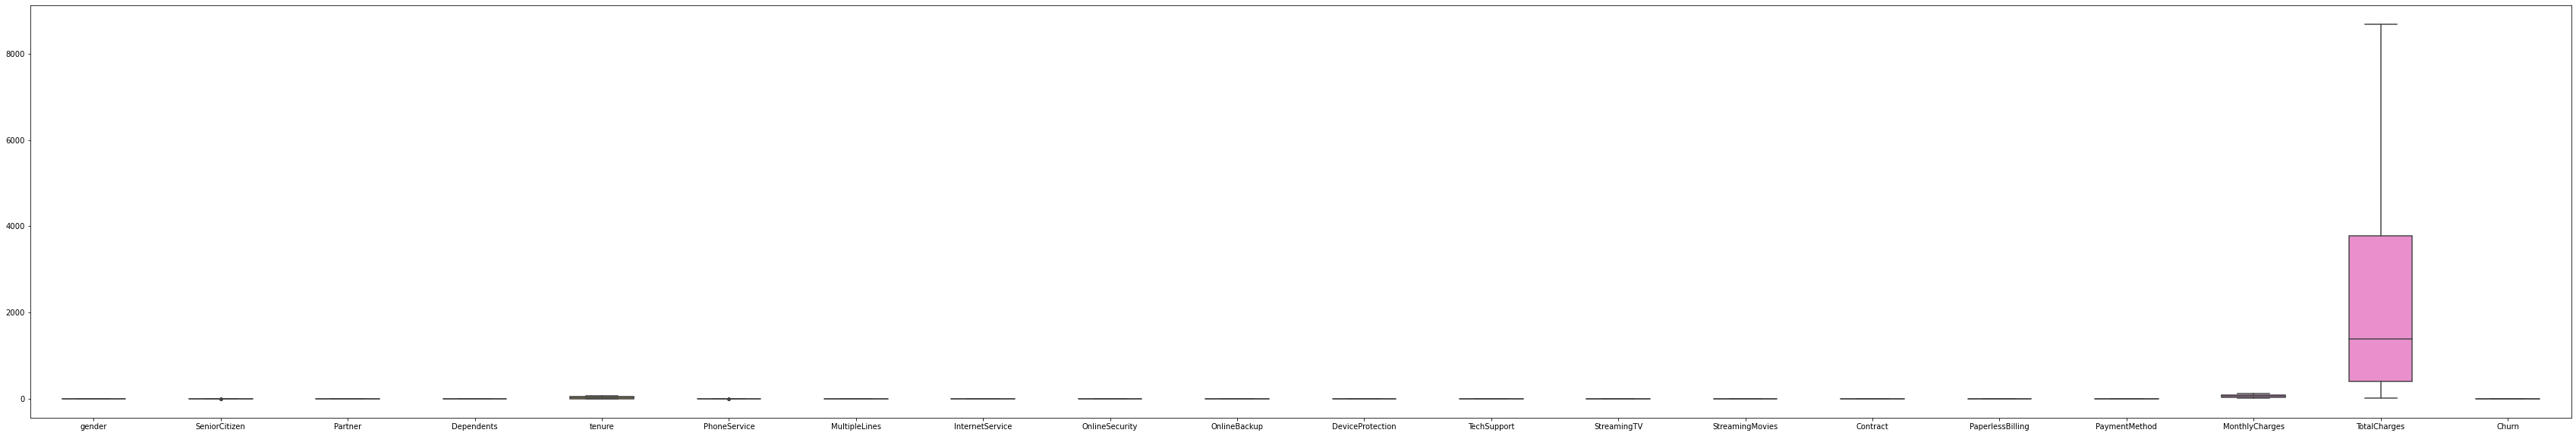

In [35]:
fig, ax =plt.subplots(figsize=(60,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- TotalCharges most outliers.

In [36]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.309838
Churn               1.063031
dtype: float64

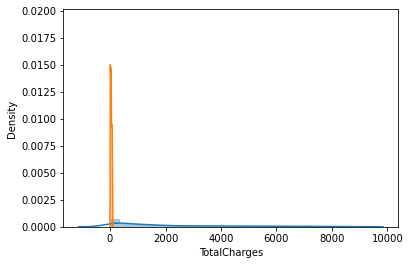

In [37]:
sns.distplot(df['TotalCharges'])
import numpy as np
df['TotalCharges']=np.sqrt(df['TotalCharges'])
sns.distplot(df['TotalCharges'])
df.skew()

- TotalCharges skewness reduced.

In [38]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- Count is not balanced, so lets balance the count to simplify the model.

In [39]:
x = pd.concat([x, y], axis=1)

In [40]:
Ano = x[x.Churn==0]
Ays = x[x.Churn==1]

In [41]:
# upsample minority
dia_upsampled = resample(Ays,
                          replace=True, # sample with replacement
                          n_samples=len(Ano),   # match number in majority
                          random_state=27)  # reproducible results

In [42]:
upsampled = pd.concat([Ano, dia_upsampled])

In [43]:
upsampled.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

- Count is now balanced and simplified for model learning.

In [44]:
x=upsampled.drop("Churn",axis=1)
y=upsampled["Churn"]

In [45]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,5.463515
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,43.468379
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,42.903963
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,44.152010
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,17.375270


In [46]:
y.head()

0    0
1    0
3    0
6    0
7    0
Name: Churn, dtype: int32

In [47]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Dividing Dataset into Independent Variables(x) & Target Variable(y)

In [48]:
x=upsampled.drop("Churn",axis=1)
y=upsampled["Churn"]

In [49]:
x.shape, y.shape

((10348, 19), (10348,))

# Applying Standard scaler to independent variables

In [50]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables

In [51]:
y.shape

(10348,)

# Decision Tree is Configured for 200 Random State

In [52]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

84.56808199121522 at random_state 0
85.65153733528551 at random_state 1
85.94436310395315 at random_state 2
84.42166910688141 at random_state 3
84.86090775988286 at random_state 4
84.24597364568082 at random_state 5
86.44216691068814 at random_state 6
85.35871156661786 at random_state 7
85.91508052708639 at random_state 8
86.85212298682285 at random_state 9
85.09516837481699 at random_state 10
85.35871156661786 at random_state 11
85.59297218155197 at random_state 12
86.12005856515374 at random_state 13
85.50512445095168 at random_state 14
84.62664714494875 at random_state 15
85.30014641288433 at random_state 16
85.41727672035138 at random_state 17
86.06149341142022 at random_state 18
85.88579795021963 at random_state 19
84.8316251830161 at random_state 20
85.30014641288433 at random_state 21
85.59297218155197 at random_state 22
85.15373352855052 at random_state 23
86.03221083455344 at random_state 24
86.06149341142022 at random_state 25
86.29575402635432 at random_state 26
86.266471449

In [53]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8769726247987117  on Random_state  188


- Best Random state selected is 188 with Best accuracy is  0.877.

# Splitting Training Set & Test Set.

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 188)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 68 computed above.

# Linear Regression

In [55]:
# Applying Logistic Regression on train and test data
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

[1 1 1 ... 1 1 0]
0.7665056360708534
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1551
           1       0.75      0.79      0.77      1554

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



- Logistic Regression learned the model with 77% accuracy.

# Decision Tree Classifier

In [56]:
# Applying Decision Tree Classifier on train and test data
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc) 

0.8821256038647343
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1551
           1       0.84      0.94      0.89      1554

    accuracy                           0.88      3105
   macro avg       0.89      0.88      0.88      3105
weighted avg       0.89      0.88      0.88      3105



- DTC learned the model with 88% accuracy.


# Random Forest Classifier

In [57]:
# Applying Random Forest Classifier on train and test data
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.8956521739130435
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1551
           1       0.86      0.95      0.90      1554

    accuracy                           0.90      3105
   macro avg       0.90      0.90      0.90      3105
weighted avg       0.90      0.90      0.90      3105



- RFC learned the model with 90% accuracy.

# Support Vector Classifier

In [58]:
# Applying Support Vector Classifier on train and test data
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.7896940418679549
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1551
           1       0.78      0.81      0.79      1554

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



- SVC learned the model with 79% accuracy.

# KNN Classifier

In [59]:
# Applying KNN Classifier on train and test data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc) 

0.7768115942028986
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1551
           1       0.74      0.86      0.79      1554

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



- KNN learned the model with 78% accuracy.

# K-fold Cross Validation

In [60]:
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True)

In [61]:
# Logistic regression 
print(cross_val_score(lg,x,y,cv=cross_validation).mean())

0.765944807522129


In [62]:
# Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=cross_validation).mean())

0.8735996058680826


In [63]:
# Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=cross_validation).mean())

0.9028796379963715


In [64]:
# Support Vector Classifier
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

0.7875912889374549


In [65]:
#  KNN Classifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean())

0.7648811183259667


# Best Model Selection

- KNN Classifier has least diff value with Knn acc & Knn Cv Score.
- lets use KNN as the best model.

# Hyperparameter & GridsearchCV

In [66]:
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

In [67]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [1, 2, 4, 5],
                         'weights': ['uniform', 'distance']})

In [68]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [69]:
Final_mod = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.63607085346216


# AUC ROC Curve

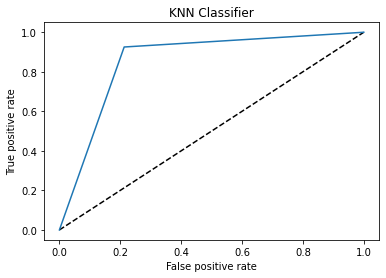

0.8562939839535585

In [74]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

# This is the best and final model.

# Exporting Model with Joblib Library

In [75]:
# Model is exported as .pkl file with the help of joblib library.
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

In [76]:
import numpy as np
a=np.array(y_test)
a


array([1, 1, 1, ..., 1, 1, 0])

In [77]:
predicted=np.array(knn.predict(x_test))
predicted
predicted.shape
knn.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
3100,1,1
3101,1,1
3102,1,1
3103,1,1
